In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [2]:
Dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Temperature.csv', index_col='Year', parse_dates=['Year'])
Dataset

,Month,Temperature
Year,,
1901-01-01,January,7.73
1901-01-01,February,8.94
1901-01-01,March,16.96
1901-01-01,April,21.27
1901-01-01,May,26.05
...,...,...
2016-01-01,August,27.63
2016-01-01,September,26.72
2016-01-01,October,22.40


In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1392 entries, 1901-01-01 to 2016-01-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        1392 non-null   object 
 1   Temperature  1392 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.6+ KB


In [4]:
Dataset.describe()

,Temperature
count,1392.000000
mean,20.007241
std,7.377184
min,5.910000
25%,13.120000
50%,21.175000
75%,27.210000
max,30.310000


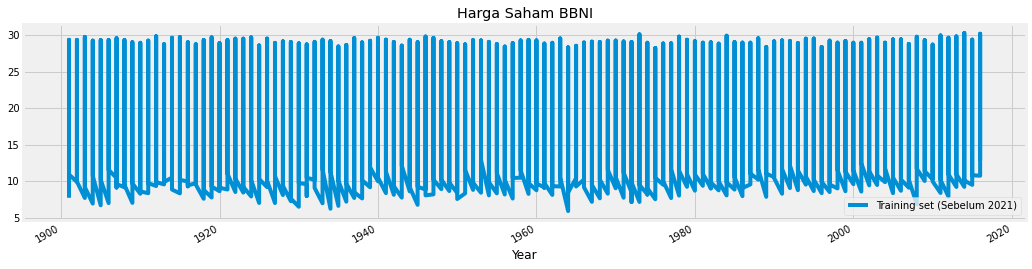

In [5]:
Dataset["Temperature"].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Sebelum 2021)','Test set (2021 dan seterusnya)'])
plt.title('Harga Saham BBNI')
plt.show()

In [6]:
month = Dataset.filter(['Month']).values
temp  = Dataset.filter(['Temperature']).values

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [12]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [13]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
hist = model.fit(x_train, y_train, batch_size =1 ,epochs=15)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1054/1054 [==============================] - 29s 25ms/step - loss: 0.0622 - mae: 0.3058
Epoch 2/15
1054/1054 [==============================] - 26s 25ms/step - loss: 0.0461 - mae: 0.2715
Epoch 3/15
1054/1054 [==============================] - 25s 24ms/step - loss: 0.0459 - mae: 0.2716
Epoch 4/15
1054/1054 [==============================] - 26s 24ms/step - loss: 0.0457 - mae: 0.2703
Epoch 5/15
1054/1054 [==============================] - 26s 25ms/step - loss: 0.0454 - mae: 0.2694
Epoch 6/15
1054/1054 [==============================] - 25s 24ms/step - loss: 0.0451 - mae: 0.2688
Epoch 7/15
1054/1054 [==============================] - 25s 24ms/step - loss: 0.0449 - mae: 0.2672
Epoch 8/15
1054/1054 [==============================] - 25s 24ms/step - loss: 0.0445 - mae: 0.2670
Epoch 9/15
1054/1054 [==============================] - 25s 23ms/step - loss: 0.0442 - mae: 0.2655
Epoch 10/15
1054/1054 [==============================] - 25s 24ms/step - loss: 0.0440 - mae: 0.2657
Epoch 11/15
1054/105

In [ ]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
 x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape
lstm_prediction = model.predict(x_test)
lstm_prediction = scaler.inverse_transform(lstm_prediction)

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Temperature asli')
    plt.plot(predicted, color='blue',label='Hasil prediksi Temperature')
    plt.title('Prediksi Temperature')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()

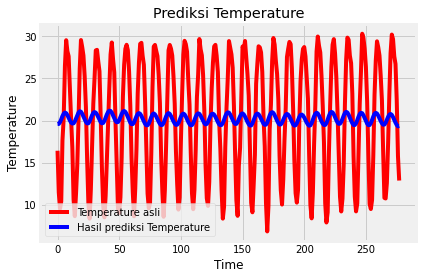

In [ ]:
plot_predictions(y_test,lstm_prediction)

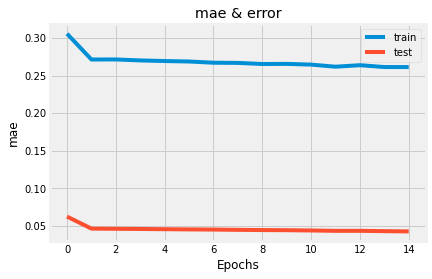

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['loss'])
plt.title('mae & error')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend(['train', 'test'], loc='upper right')
plt.show()